**Evaluation Project 7 - Customer Churn Analysis**

**Problem Statement:**

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # Filtering warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from collections import Counter
import plotly.graph_objs as go
import plotly.offline as py

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telecom_customer_churn.csv to Telecom_customer_churn (1).csv


In [ ]:
# Importing Customer Churn Analysis dataset csv file
import io
df = pd.read_csv(io.BytesIO(uploaded['Telecom_customer_churn.csv']))

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print("\033[1m" + 'Number of rows in the given dataset:' + "\033[0m")
print(df.shape[0])

print("\033[1m" + 'Number of columns in the given dataset:'  + "\033[0m")
df.shape[1]

Number of rows in the given dataset:
7043
Number of columns in the given dataset:


21

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


The dataset contains the data of the customer. On the basis of the data we have to **predict the customer churn.**The dataset contains the data like 'customerID', 'gender', 'SeniorCitizen', 'Partner','Dependents','tenure', 'PhoneService', 'MultipleLines', InternetService', OnlineSecurity', OnlineBackup','DeviceProtection,'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges' and 'Churn'.

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

* **SeniorCitizen** is a categorical variable but it is listed as int64,need to change its datatype to object.

* **TotalCharges** feature is numerical in nature but categories as object datatypes. This implies that there is presence of string variable in this column or might be data error.

* **CustomerID** is unnecessary variable from our analytical & modelling viewpoint. We will drop 'CustomerID' column.

In [ ]:
df = df.drop('customerID',axis=1)

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

In [ ]:
df.loc[df['TotalCharges']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
# Replacing void spaces into null values
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)

In [ ]:
# Checking missing values in the dataset
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now we need to fill these null values in the **'TotalCharges' column.** But first converting 'TotalCharges' column from object to float datatype

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
# Imputing the missing values of Totalcharges column with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Now, there is no null values in the dataset, we can proceed further.**

**Checking Duplicates in the dataset**

In [ ]:
df.duplicated().sum()

22

In [ ]:
# Dropping the duplicated entries
df.drop_duplicates(inplace=True)

In [ ]:
print("\033[1m" + 'After removing duplicates,number of rows in the given dataset:' + "\033[0m")
print(df.shape[0])

print("\033[1m" + 'After removing duplicates,number of columns in the given dataset:'  + "\033[0m")
df.shape[1]

After removing duplicates,number of rows in the given dataset:
7021
After removing duplicates,number of columns in the given dataset:


20

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Separating the categorical variables
catg = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

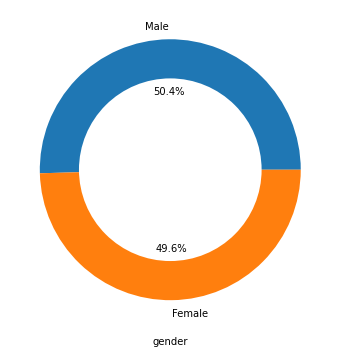

<Figure size 432x288 with 0 Axes>

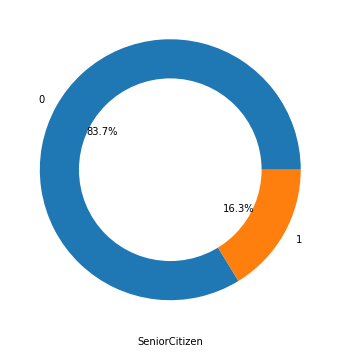

<Figure size 432x288 with 0 Axes>

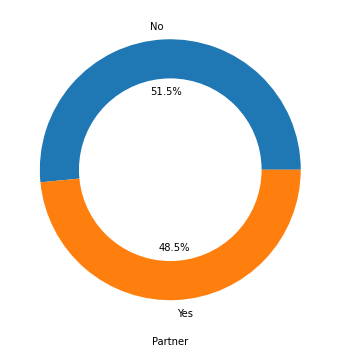

<Figure size 432x288 with 0 Axes>

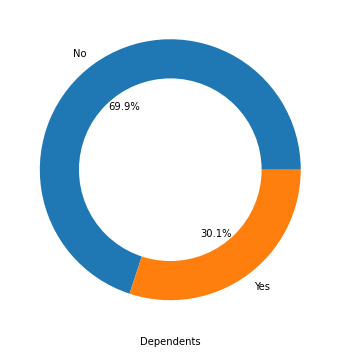

<Figure size 432x288 with 0 Axes>

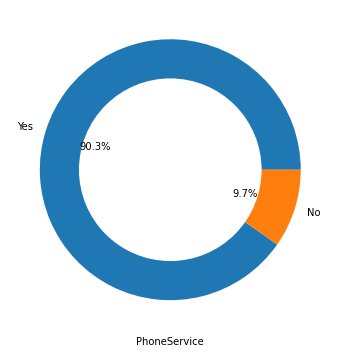

<Figure size 432x288 with 0 Axes>

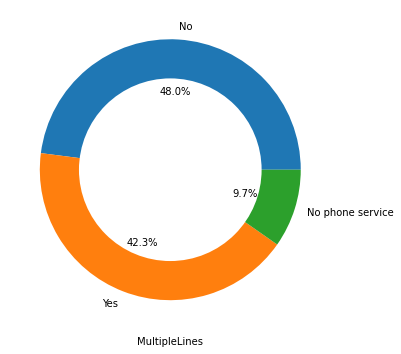

<Figure size 432x288 with 0 Axes>

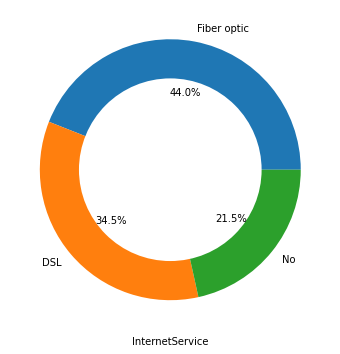

<Figure size 432x288 with 0 Axes>

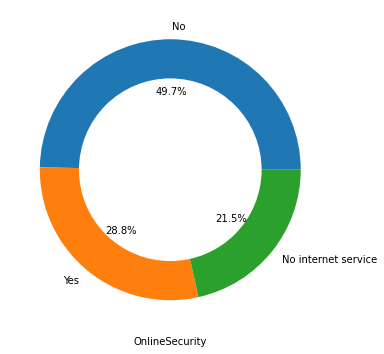

<Figure size 432x288 with 0 Axes>

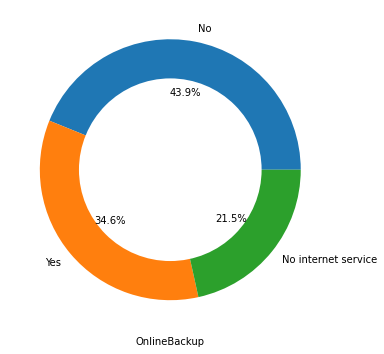

<Figure size 432x288 with 0 Axes>

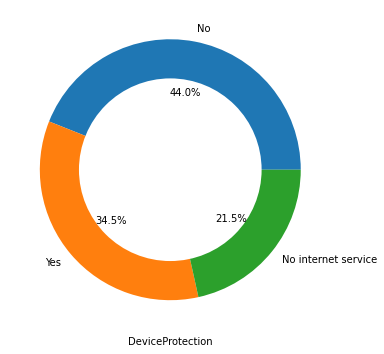

<Figure size 432x288 with 0 Axes>

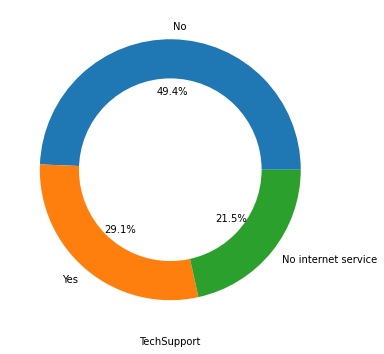

<Figure size 432x288 with 0 Axes>

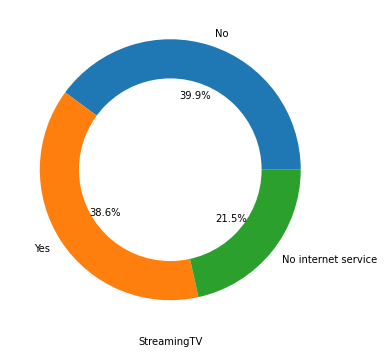

<Figure size 432x288 with 0 Axes>

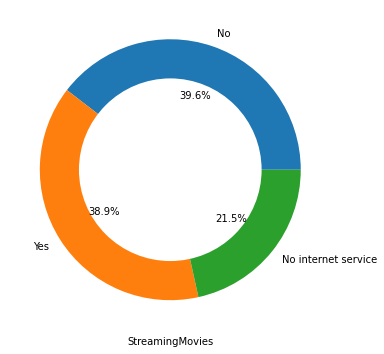

<Figure size 432x288 with 0 Axes>

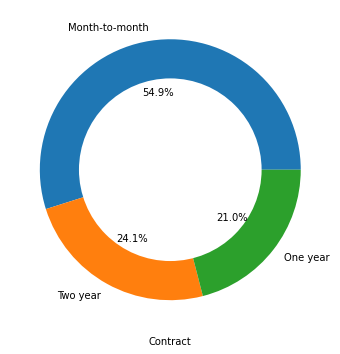

<Figure size 432x288 with 0 Axes>

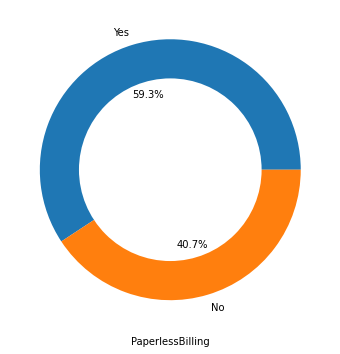

<Figure size 432x288 with 0 Axes>

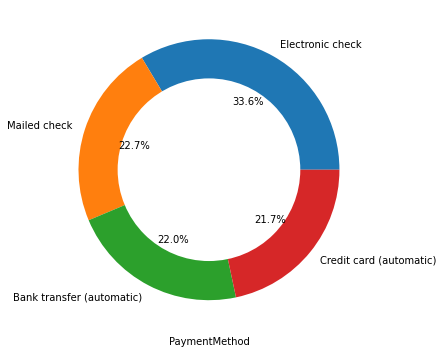

<Figure size 432x288 with 0 Axes>

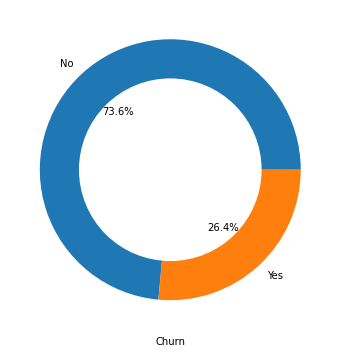

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in catg:
    plt.figure(figsize=(10,6))
    df[i].value_counts().plot.pie(autopct='%1.1f%%')
    centre=plt.Circle((0,0),0.7,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre)
    plt.xlabel(i)
    plt.ylabel('')
    plt.figure()

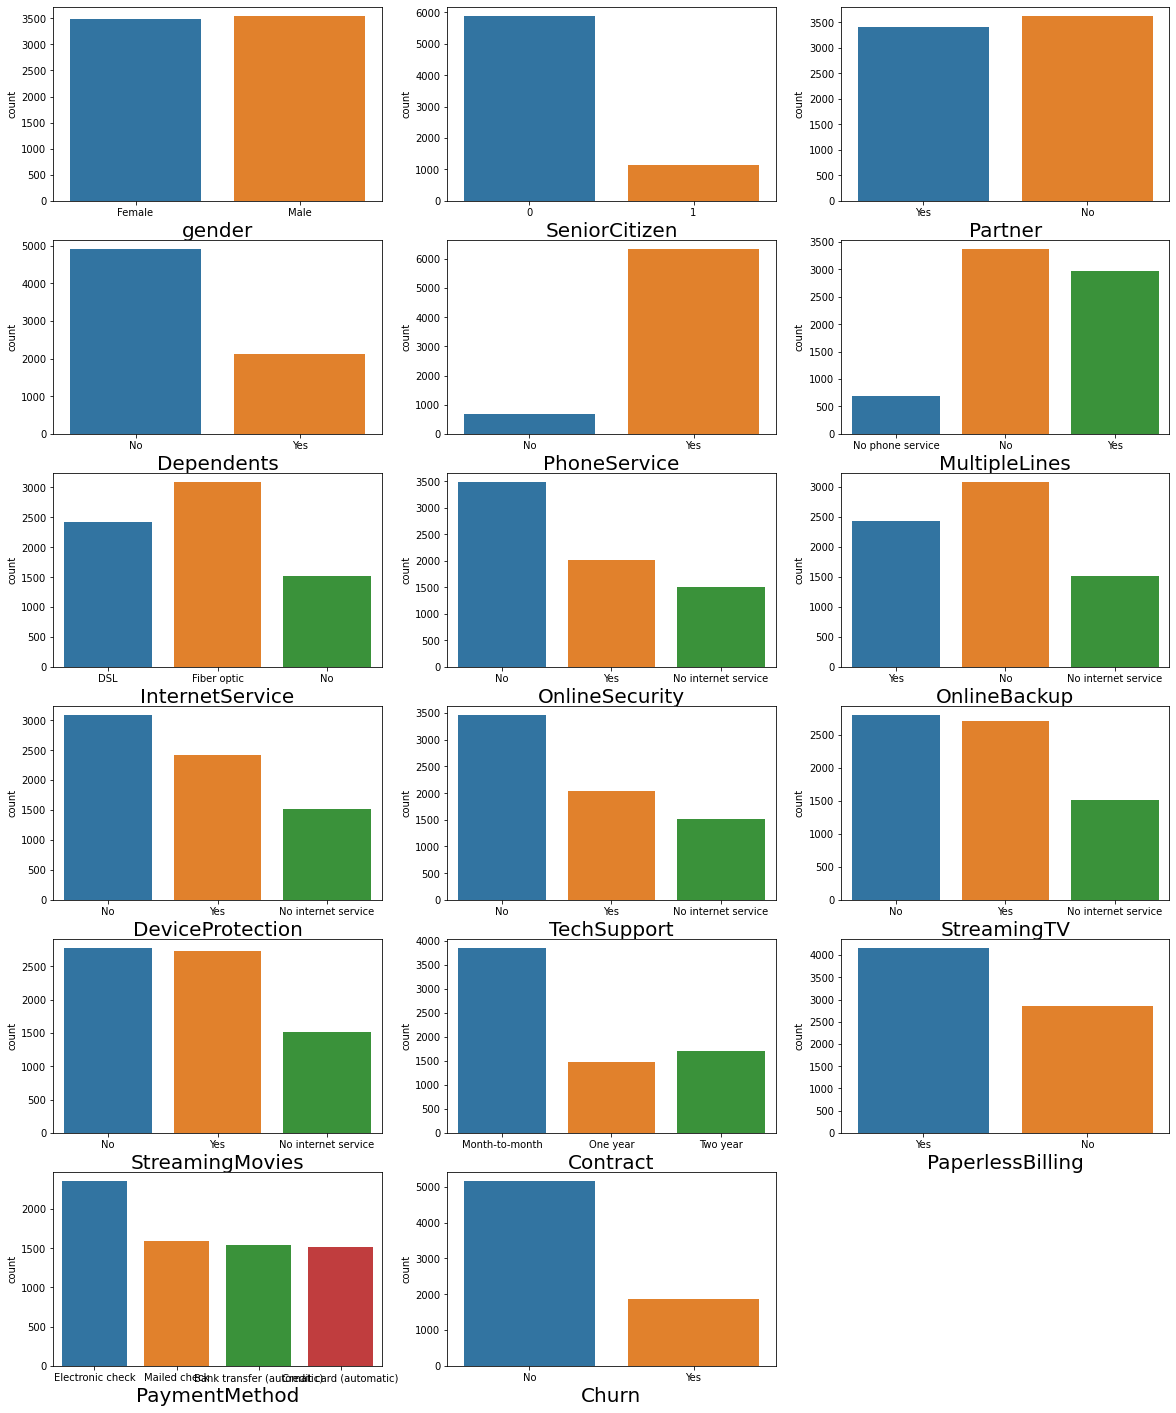

In [ ]:
plt.figure(figsize=(20,25),facecolor='w')
plotnumber=1
for column in catg:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
for i in catg:
    print(i)
    print(df[i].value_counts())
    print("="*100)

gender
Male      3541
Female    3480
Name: gender, dtype: int64
SeniorCitizen
0    5880
1    1141
Name: SeniorCitizen, dtype: int64
Partner
No     3619
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4911
Yes    2110
Name: Dependents, dtype: int64
PhoneService
Yes    6339
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64
TechSupport
No                     

* 26.4 % Customer choose to **churn service**, which is quite high number.This leads to imbalanced data case as **churn is our target variable.**

* There are only **16.3 % of the customers who are senior citizens.** Thus most of our customers in the data are **younger people.**

* There are **51.5% of married customer**.

* Number of dependent customers is 2110 and number of independent customer is 4911

* Total number of customers using phone services is 6339 and number of customers who is not using phone service is 682

* Number of customers using multiple lines is 2971 and customers with single line is 3368

* Number of customers using Internet service is 5509 and customers with no internet service is 1512

* Number of customers who don't use Internet service is 1512 and customers with online backup is 2429 and who don't use online backup is 3080

* Number of customers who don't use Internet service is 1512 and customers with device protection is 2422 and who don't use device protection is 3087

* Number of customers who don't use Internet service is 1512 and customers with tech support is 2044 and who don't use tech support is 3465

* Number of customers who don't use Internet service is 1512 and customers using Streaming TV service is 2707 and who don't use Streaming TV service is 2802

* Number of customers who don't use Internet service is 1512 and customers using Streaming Movies service is 2732 and who don't use Streaming Movies service is 2777


* Almost 55% customer perfer month to month contract compare to others

* Number of customers who use Paperless billing is 4161 and who use paper billing is 2860 cutomers.

* Number of customers who use Electronic check is 2359, who use mailed check for payment is 1596, automatic Bank transfer payment is 1544 and automatic credit card payment is 1522.

In [ ]:
df[catg].describe().T

,count,unique,top,freq
gender,7021,2,Male,3541
SeniorCitizen,7021,2,0,5880
Partner,7021,2,No,3619
Dependents,7021,2,No,4911
PhoneService,7021,2,Yes,6339
MultipleLines,7021,3,No,3368
InternetService,7021,3,Fiber optic,3090
OnlineSecurity,7021,3,No,3490
OnlineBackup,7021,3,No,3080
DeviceProtection,7021,3,No,3087


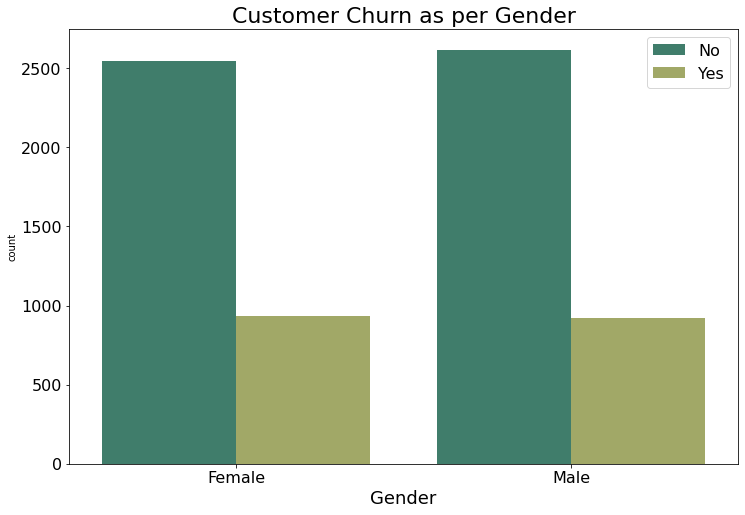

In [ ]:
plt.figure(figsize=(12,8))
p = sns.countplot(df['gender'], hue=df['Churn'], palette='gist_earth')
plt.title('Customer Churn as per Gender', fontsize=22)
p.set_xlabel('Gender',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

**Almost equal number of male and female dissatisfied with the telecom company**

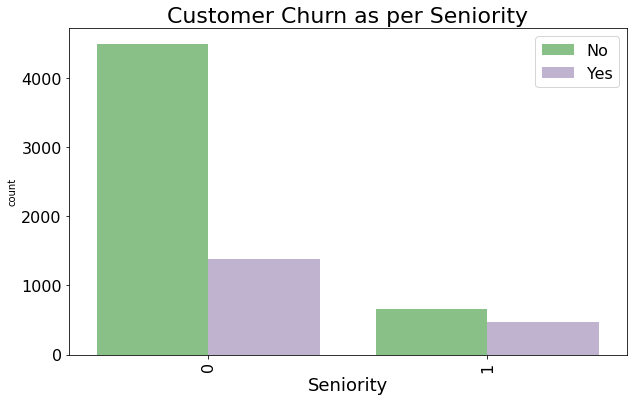

In [ ]:
plt.figure(figsize=(10,6))
p = sns.countplot(df['SeniorCitizen'], hue=df['Churn'], palette='Accent')
plt.title('Customer Churn as per Seniority', fontsize=22)
p.set_xlabel('Seniority',fontsize=18)
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

**More number of young people are dissatified and switching one telecom operator to other but it is obvious as almost 84% of younger people were present in the observation**

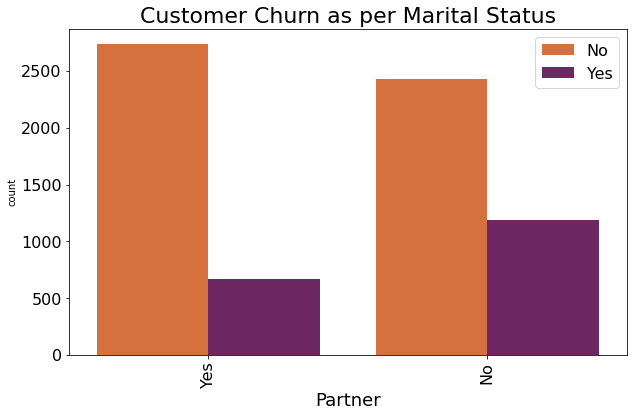

In [ ]:
plt.figure(figsize=(10,6))
p = sns.countplot(df['Partner'], hue=df['Churn'], palette='inferno_r')
plt.title('Customer Churn as per Marital Status', fontsize=22)
p.set_xlabel('Partner',fontsize=18)
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

**Bachelors are more reluctant to churn as per above plot**

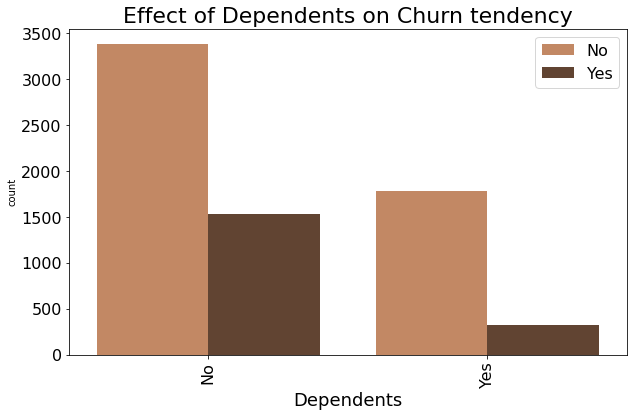

In [ ]:
plt.figure(figsize=(10,6))
p = sns.countplot(df['Dependents'], hue=df['Churn'], palette='copper_r')
plt.title('Effect of Dependents on Churn tendency', fontsize=22)
p.set_xlabel('Dependents',fontsize=18)
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

**Customer having depedents have less tendency to Churn**

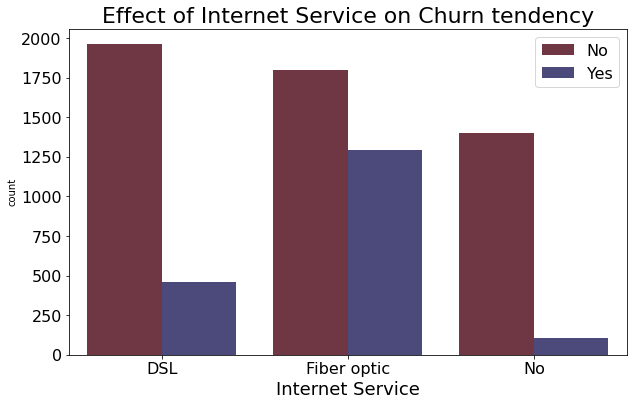

In [ ]:
plt.figure(figsize=(10,6))
p = sns.countplot(df['InternetService'], hue=df['Churn'], palette='icefire_r')
plt.title('Effect of Internet Service on Churn tendency', fontsize=22)
p.set_xlabel('Internet Service',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

**Customers using Fibre optic Internet seveice have more tendency to churn when compared with DSL and No Internet service**

**Lets find the reason for this by seeing the charges of their Internet service**

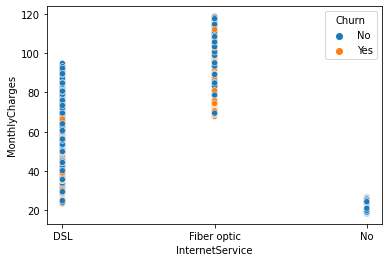

In [ ]:
sns.scatterplot(x="InternetService", y='MonthlyCharges',data=df,hue="Churn")

**High monthly charges  can be seen among customers using fiber optic compare to DSL. So, high charges might be the reason of customer churn.**

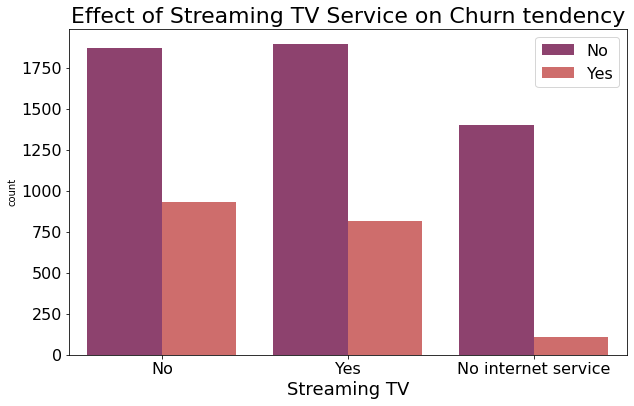

In [ ]:
plt.figure(figsize=(10,6))
p = sns.countplot(df['StreamingTV'], hue=df['Churn'], palette='flare_r')
plt.title('Effect of Streaming TV Service on Churn tendency', fontsize=22)
p.set_xlabel('Streaming TV',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

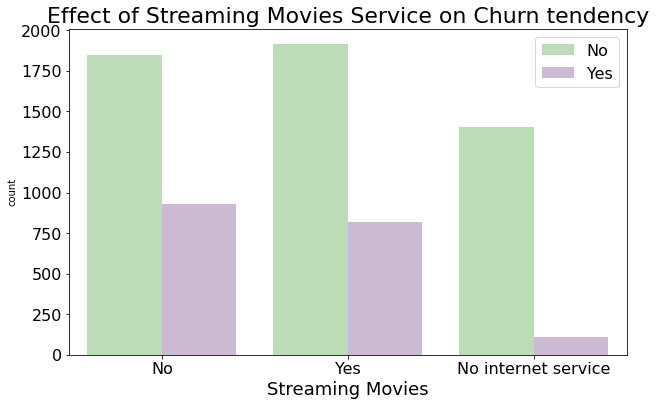

In [ ]:
plt.figure(figsize=(10,6))
p = sns.countplot(df['StreamingMovies'], hue=df['Churn'], palette='PRGn_r')
plt.title('Effect of Streaming Movies Service on Churn tendency', fontsize=22)
p.set_xlabel('Streaming Movies',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

**Nothing much to interpretate from Streaming TV and movies service as equal amount of churning and non-churning can be seen for both the service**

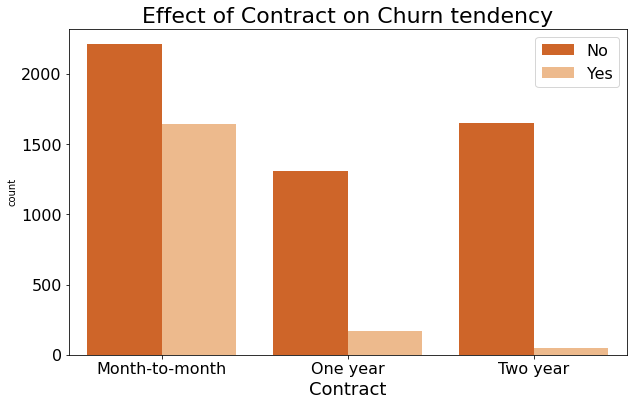

In [ ]:
plt.figure(figsize=(10,6))
p = sns.countplot(df['Contract'], hue=df['Churn'], palette='Oranges_r')
plt.title('Effect of Contract on Churn tendency', fontsize=22)
p.set_xlabel('Contract',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

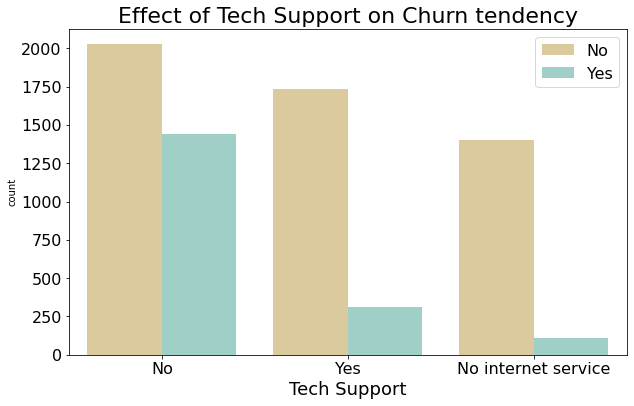

In [ ]:
plt.figure(figsize=(10,6))
p = sns.countplot(df['TechSupport'], hue=df['Churn'], palette='BrBG')
plt.title('Effect of Tech Support on Churn tendency', fontsize=22)
p.set_xlabel('Tech Support',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

**Customers with no Technical support are more reluctant to churn**

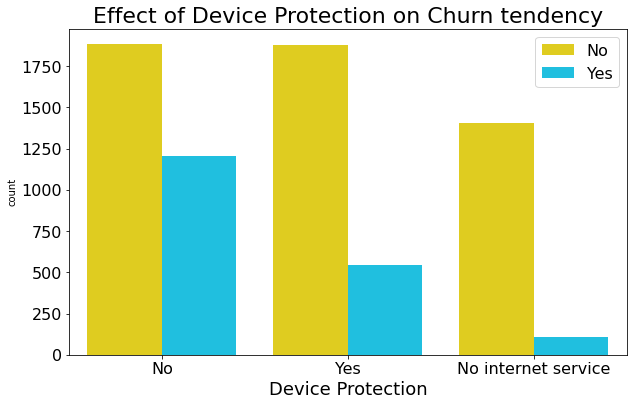

In [ ]:
plt.figure(figsize=(10,6))
p = sns.countplot(df['DeviceProtection'], hue=df['Churn'], palette='jet_r')
plt.title('Effect of Device Protection on Churn tendency', fontsize=22)
p.set_xlabel('Device Protection',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

**Customers with no device protection have more tendency to churn**

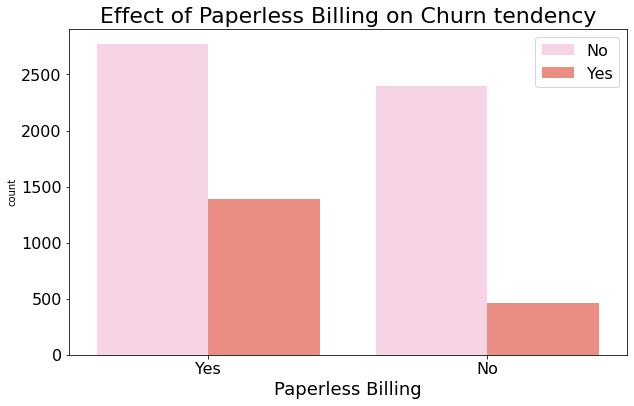

In [ ]:
plt.figure(figsize=(10,6))
p = sns.countplot(df['PaperlessBilling'], hue=df['Churn'], palette='Set3_r')
plt.title('Effect of Paperless Billing on Churn tendency', fontsize=22)
p.set_xlabel('Paperless Billing',fontsize=18)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

**Almost 60% customers in the observation prefer paperless billing and this section have more tendency to churn**

In [ ]:
num = ['tenure','MonthlyCharges', 'TotalCharges']

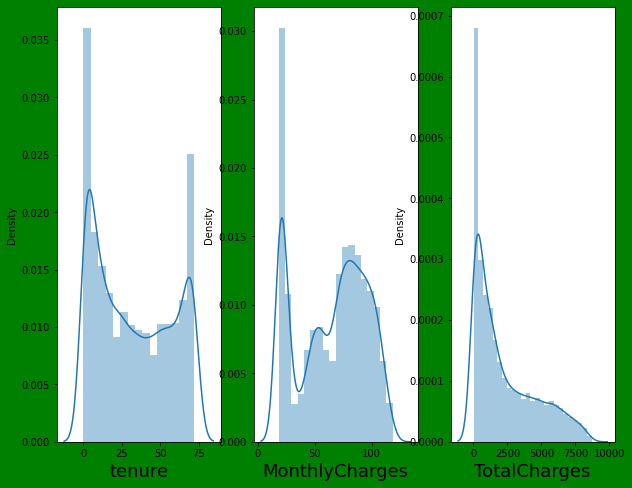

In [ ]:
plt.figure(figsize=(10,8),facecolor='g')
plotnumber=1
for column in num:
    if plotnumber<=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.show()

In [ ]:
# Checking skewness
df.skew()

SeniorCitizen     1.829987
tenure            0.235542
MonthlyCharges   -0.224097
TotalCharges      0.959088
dtype: float64

Skewness permissible limit is +/- 0.5

TotalCharges has high skewness and positively skewed

Senior is a categorical variable hence skewness is irrelevant for it

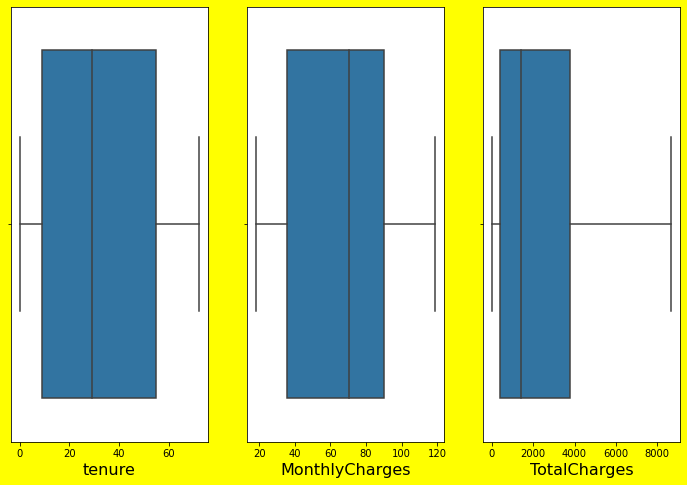

In [ ]:
# Lets see the outliers present in the data using boxplot

plt.figure(figsize=(12,8),facecolor='yellow')
plotnumber=1

for column in num:
    if plotnumber<=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=16)
    plotnumber+=1
plt.show()

**No Outliers present in the dataset**

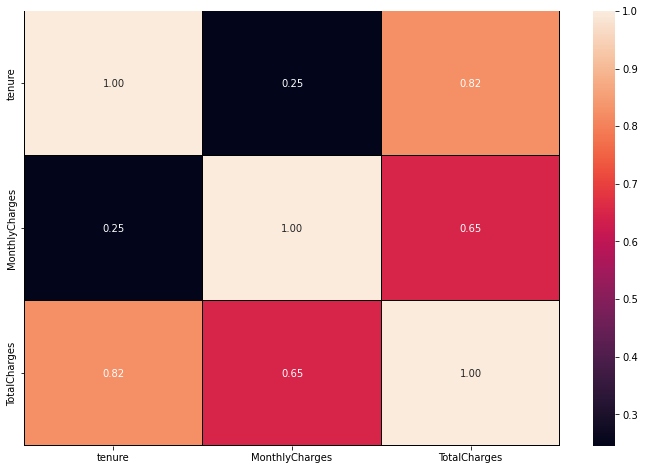

In [ ]:
# Plotting heatmap and checking correlation

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot =True,linewidths=0.15,linecolor='black',fmt="0.2f")

**The correlation looks decent and good to proceed further**

**ENCODING THE CATEGORICAL VARIABLES**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = le.fit_transform(df[i].values.reshape(-1,1))

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**SKEWNESS REDUCTION**

In [ ]:
# Considering skewness reduction through PowerTransformer

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [ ]:
# Seperating features and target variable for classification task

X = df.drop('Churn',axis=1)

y = df['Churn']

In [ ]:
# Applying Power transformer

X_new_pt = pt.fit_transform(X)

# Converting numpy array(X_new_pt) into Dataframe and reassigning the values

X = pd.DataFrame(X_new_pt,columns= X.columns)

# Checking Skewness

X.skew().sort_values(ascending=False)

SeniorCitizen       1.829987
Dependents          0.870322
Contract            0.297934
OnlineSecurity      0.150084
TechSupport         0.140414
Partner             0.061857
MultipleLines       0.028603
DeviceProtection    0.000849
OnlineBackup       -0.001635
gender             -0.017381
InternetService    -0.071493
StreamingTV        -0.098052
StreamingMovies    -0.106539
TotalCharges       -0.143822
PaymentMethod      -0.206316
tenure             -0.243646
MonthlyCharges     -0.259855
PaperlessBilling   -0.377214
PhoneService       -2.721300
dtype: float64

**All continuous variables have skewness within the permissible limit and it is irrelevant for categorical variables**

**BALANCING TARGET VARIABLE USING SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
over_smp = SMOTE(0.8)

In [ ]:
print("The number of target classes before fit{}".format(Counter(y)))

The number of target classes before fitCounter({0: 5164, 1: 1857})


**Clearly visible the data is imbalanced**

In [ ]:
X,y = over_smp.fit_resample(X,y)
print("The number of target classes after fit{}".format(Counter(y)))

The number of target classes after fitCounter({0: 5164, 1: 4131})


**Standard Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaler = scaler.fit_transform(X)

In [ ]:
# Checking multicollinearity in the dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaler,i) for i in range(X.shape[1])]
vif['Features'] = X.columns

vif

,vif,Features
0,1.003089,gender
1,1.151983,SeniorCitizen
2,1.500458,Partner
3,1.409321,Dependents
4,32.957930,tenure
5,1.739492,PhoneService
6,1.426152,MultipleLines
7,1.764817,InternetService
8,1.403631,OnlineSecurity
9,1.238512,OnlineBackup


* **Tenure and TotalCharges showing vif value greater than 10**

* **It means multicollinearity is present in the dataset**

* **We will apply PCA to deal with multicollinearity**

**PRINCIPAL COMPONENT ANALYSIS**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaler)

array([[-2.75309717,  0.4355675 ,  2.87372997, ...,  0.69582799,
        -0.40640662, -0.02235923],
       [-0.50109664,  1.52360373,  0.81451602, ...,  0.19495256,
         0.03416362,  0.04606429],
       [-2.65408977,  0.87146781,  0.42507995, ...,  0.68719124,
         0.229324  , -0.06453815],
       ...,
       [-1.37210034, -0.0189085 ,  0.50176903, ..., -0.84635268,
        -0.27746002,  0.09619082],
       [ 2.14523347,  0.47785425,  2.73434674, ...,  0.0339959 ,
        -0.30123352,  0.00452573],
       [ 1.01134221, -2.1934633 , -0.74207206, ..., -0.1004391 ,
         0.36248154,  0.04855424]])

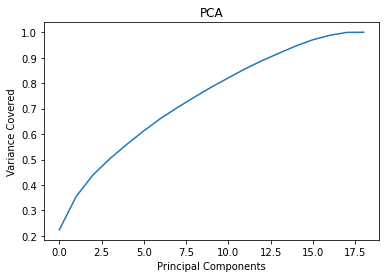

In [ ]:
# Lets plot scree plot to check the best components

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

**Around 16 components are able to explain more than 95% variance in the dataset and hence its safe to consider 16 PC's**

In [ ]:
pca = PCA(n_components=16)
new_pcomp = pca.fit_transform(X_scaler)
princ_comp = pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16'])
princ_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-2.753097,0.435568,2.873730,0.192411,0.875418,1.235275,1.135920,-1.610368,-1.488920,-1.068593,0.153262,-0.151215,0.082051,0.088376,-0.035944,-1.494853
1,-0.501097,1.523604,0.814516,0.939438,-0.588768,-1.344997,-0.585908,0.343482,2.102353,1.134424,1.338381,-0.561788,-1.535690,-0.276805,-0.956656,0.411905
2,-2.654090,0.871468,0.425080,0.356416,-0.578846,-1.152757,-0.552390,-2.365402,0.012008,0.621626,0.337749,0.608602,-1.502712,0.125617,0.614953,-0.104337
3,0.725332,1.969884,3.389159,2.594794,-0.236451,-0.950245,-0.419248,1.670113,-0.085313,0.187093,-0.211230,-1.070294,-0.055813,-0.212132,0.469412,0.034258
4,-3.231858,-0.335700,-0.432627,-0.397421,-0.769395,0.875748,-0.844085,-0.191641,-0.256335,0.287600,0.006709,-0.341756,0.011242,-0.000568,-0.609547,0.010598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9290,-2.599865,-0.370120,-0.034716,-0.130948,-0.742029,0.755259,-0.073561,0.173142,2.027556,-1.313456,-0.213248,-0.521907,0.413409,-0.112652,-0.122743,0.045864
9291,3.256598,-1.484173,-0.621103,-0.808693,1.123158,-0.891429,1.638201,-0.651508,-0.157308,0.828164,0.536822,-0.037462,1.534217,0.163804,0.806008,0.983557
9292,-1.372100,-0.018909,0.501769,-2.922276,0.143476,-1.008490,-0.446098,-0.141983,-0.299861,0.458622,0.073993,-0.154168,0.068935,0.060849,-0.811216,0.140466
9293,2.145233,0.477854,2.734347,-0.073382,2.379884,-0.394748,0.616380,-0.158581,-1.229355,-1.211253,0.248238,1.162573,-0.899706,-0.072087,-0.394923,0.443460


**MODEL BUILDING - CLASSIFICATION TASK**

In [66]:
# Importing required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV

**Defining function for calculating Model Performance**

In [ ]:
# Defining function for calculating the performance of the classification model

def metric_score(clf,X_train,X_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(X_train)
        
        print("-----------------Train Result--------------------")
        
        print(f"Train Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train == False:
        
        pred = clf.predict(X_test)
        
        matrix = confusion_matrix(y_test,pred)
        
        print("-----------------Test Result--------------------")
        
        print("=====Confusion Matrix======= \n",matrix)
        
        print(f"Test Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%")
        
        print("\n Test Classification Report \n ", classification_report(y_test,pred,digits =2))

**BEST RANDOM STATE**

In [ ]:
from sklearn.model_selection import train_test_split
maxAccu = 0 # Max Accuracy
maxRS = 0   # Best random state for which maximum accuracy is achieved

for i in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(princ_comp,y,test_size=0.2,random_state=i)
  
    rf = RandomForestClassifier()
    
    rf.fit(X_train,y_train)    # Training the model
   
    pred_rf = rf.predict(X_test)    # Predicting the target variable
 
    acc_rf = accuracy_score(y_test,pred_rf)
  
    if acc_rf>maxAccu:
    
        maxAccu = acc_rf
        
        maxRS = i
        
print("Maximum Accuracy:",maxAccu,"at random state ", maxRS)

Maximum Accuracy: 0.8380849919311458 at random state  15


**Train test Split using best Random State**

In [65]:
X_train,X_test,y_train,y_test = train_test_split(princ_comp,y,test_size=0.2,random_state=15)

**Logistic Regression**

In [67]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

pred_lr = lr.predict(X_test)    # Predicted values

metric_score(lr,X_train,X_test,y_train,y_test,train=True)

metric_score(lr,X_train,X_test,y_train,y_test,train=False)

cr_lr = cross_val_score(lr,princ_comp,y,cv=5)

print("Cross validation score of Logistic regression model :",cr_lr.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 76.45%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[820 218]
 [181 640]]
Test Accuracy Score : 78.54%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.82      0.79      0.80      1038
           1       0.75      0.78      0.76       821

    accuracy                           0.79      1859
   macro avg       0.78      0.78      0.78      1859
weighted avg       0.79      0.79      0.79      1859

Cross validation score of Logistic regression model : 76.82625067240453


**Tuning parameteres for Logistic regression**

In [68]:
lr_params = {'penalty':['l1', 'l2'],
             'tol':[0.0001,0.001,0.01],
             'solver':['newton-cg', 'lbfgs', 'liblinear'],
             'multi_class':['auto', 'ovr', 'multinomial']}

grd_lr = GridSearchCV(lr,param_grid = lr_params, n_jobs =-1)

grd_lr.fit(X_train,y_train)

print("Best parameters : ",grd_lr.best_params_)

Best parameters :  {'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}


In [69]:
lr = grd_lr.best_estimator_

lr.fit(X_train,y_train)

pred_lr = lr.predict(X_test)    # Predicted values

metric_score(lr,X_train,X_test,y_train,y_test,train=True)

metric_score(lr,X_train,X_test,y_train,y_test,train=False)

cr_lr = cross_val_score(lr,princ_comp,y,cv=5)

print("Cross validation score of Logistic regression model :",cr_lr.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 76.44%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[820 218]
 [181 640]]
Test Accuracy Score : 78.54%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.82      0.79      0.80      1038
           1       0.75      0.78      0.76       821

    accuracy                           0.79      1859
   macro avg       0.78      0.78      0.78      1859
weighted avg       0.79      0.79      0.79      1859

Cross validation score of Logistic regression model : 76.85852608929532


**KNN Classifier**

In [70]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

pred_knn = knn.predict(X_test)    # Predicted values

metric_score(knn,X_train,X_test,y_train,y_test,train=True)

metric_score(knn,X_train,X_test,y_train,y_test,train=False)

cr_knn = cross_val_score(knn,princ_comp,y,cv=5)

print("Cross validation score of K Neighbors Classifier model :",cr_knn.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 84.48%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[764 274]
 [113 708]]
Test Accuracy Score : 79.18%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.87      0.74      0.80      1038
           1       0.72      0.86      0.79       821

    accuracy                           0.79      1859
   macro avg       0.80      0.80      0.79      1859
weighted avg       0.80      0.79      0.79      1859

Cross validation score of K Neighbors Classifier model : 77.52555137170522


Better results can be seen for KNN Classifier model when compared to Logistic Regression. Let's tune the parameters for KNN model

In [71]:
 knn_params = { 'n_neighbors':[4,5],
        'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','brute'],
    'leaf_size':[25,30]}

grd_knn = GridSearchCV(knn,param_grid = knn_params, n_jobs =-1)

grd_knn.fit(X_train,y_train)

print("Best parameters : ",grd_knn.best_params_)

Best parameters :  {'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 4, 'weights': 'distance'}


In [72]:
knn = grd_knn.best_estimator_

knn.fit(X_train,y_train)

pred_knn = knn.predict(X_test)    # Predicted values

metric_score(knn,X_train,X_test,y_train,y_test,train=True)

metric_score(knn,X_train,X_test,y_train,y_test,train=False)

cr_knn = cross_val_score(knn,princ_comp,y,cv=5)

print("Cross validation score of K Neighbors Classifier model :",cr_knn.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 99.87%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[813 225]
 [128 693]]
Test Accuracy Score : 81.01%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.86      0.78      0.82      1038
           1       0.75      0.84      0.80       821

    accuracy                           0.81      1859
   macro avg       0.81      0.81      0.81      1859
weighted avg       0.82      0.81      0.81      1859

Cross validation score of K Neighbors Classifier model : 80.43033889187734


**Decision Tree Classifier**

In [73]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)      # Model training

pred_dt = dt.predict(X_test)    # Predicted values

metric_score(dt,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(dt,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_dt = cross_val_score(dt,princ_comp,y,cv=5)

print("Cross validation score of Decision Tree Classifier model :",cr_dt.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 99.87%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[798 240]
 [243 578]]
Test Accuracy Score : 74.02%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.77      0.77      0.77      1038
           1       0.71      0.70      0.71       821

    accuracy                           0.74      1859
   macro avg       0.74      0.74      0.74      1859
weighted avg       0.74      0.74      0.74      1859

Cross validation score of Decision Tree Classifier model : 75.06186121570737


**Tuning parameters for Decision Tree**

In [75]:
grid_param = {'criterion':['gini','entropy'],
              'max_depth': range(9,15),
              'min_samples_leaf': range(3,7),
              'min_samples_split': range(2,6)
             }

grid_search = GridSearchCV(estimator = dt, param_grid = grid_param,n_jobs =-1)

grid_search.fit(X_train,y_train)

print("Best parameters : ",grid_search.best_params_)

Best parameters :  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5}


In [76]:
dt = grid_search.best_estimator_

dt.fit(X_train,y_train)      # Model training

pred_dt = dt.predict(X_test)    # Predicted values

metric_score(dt,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(dt,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_dt = cross_val_score(dt,princ_comp,y,cv=5)

print("Cross validation score of Decision Tree Classifier model :",cr_dt.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 87.76%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[778 260]
 [183 638]]
Test Accuracy Score : 76.17%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.81      0.75      0.78      1038
           1       0.71      0.78      0.74       821

    accuracy                           0.76      1859
   macro avg       0.76      0.76      0.76      1859
weighted avg       0.77      0.76      0.76      1859

Cross validation score of Decision Tree Classifier model : 75.45992469069391


**Random Forest Classifier**

In [77]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)      # Model training

pred_rf = rf.predict(X_test)    # Predicted values

metric_score(rf,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(rf,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_rf = cross_val_score(rf,princ_comp,y,cv=5)

print("Cross validation score of Random Forest Classifier model :",cr_rf.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 99.87%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[890 148]
 [167 654]]
Test Accuracy Score : 83.06%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.84      0.86      0.85      1038
           1       0.82      0.80      0.81       821

    accuracy                           0.83      1859
   macro avg       0.83      0.83      0.83      1859
weighted avg       0.83      0.83      0.83      1859

Cross validation score of Random Forest Classifier model : 82.27003765465304


Far better result can be seen for Random Forest Classifier until now

**Tuning parameters for Random Forest**

In [78]:
params_rf = {'criterion':['gini','entropy'],
         'max_depth': [10,12,25,30],
         'min_samples_split' :[2,3,4],
         'min_samples_leaf' :[2,3,4,5]}

grd_rf = GridSearchCV(rf,param_grid = params_rf,n_jobs =-1)

grd_rf.fit(X_train,y_train)

print("Best parameters : ",grd_rf.best_params_)

Best parameters :  {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [79]:
rf = grd_rf.best_estimator_

rf.fit(X_train,y_train)

pred_rf = rf.predict(X_test)    # Predicted values

metric_score(rf,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(rf,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_rf = cross_val_score(rf,princ_comp,y,cv=5)

print("Cross validation score of Random Forest Classifier model :",cr_rf.mean()*100)

-----------------Train Result--------------------
Train Accuracy Score : 99.06%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[885 153]
 [154 667]]
Test Accuracy Score : 83.49%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.85      0.85      0.85      1038
           1       0.81      0.81      0.81       821

    accuracy                           0.83      1859
   macro avg       0.83      0.83      0.83      1859
weighted avg       0.83      0.83      0.83      1859

Cross validation score of Random Forest Classifier model : 81.85045723507261


**Support Vector Classifier**

In [80]:
svc = SVC()

svc.fit(X_train,y_train)

pred_svc = svc.predict(X_test)    # Predicted values

metric_score(svc,X_train,X_test,y_train,y_test,train=True)

metric_score(svc,X_train,X_test,y_train,y_test,train=False)

cr_svc = cross_val_score(svc,princ_comp,y,cv=5)

print("Cross validation score of Support Vector Classifier model :",cr_svc.mean()*100)


-----------------Train Result--------------------
Train Accuracy Score : 81.62%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[847 191]
 [161 660]]
Test Accuracy Score : 81.07%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.84      0.82      0.83      1038
           1       0.78      0.80      0.79       821

    accuracy                           0.81      1859
   macro avg       0.81      0.81      0.81      1859
weighted avg       0.81      0.81      0.81      1859

Cross validation score of Support Vector Classifier model : 79.11780527165142


**Difference between training and test accuracy is minimum and hence best result can be seen for the given dataset as far as Support Vector Classifier is concerned**

**Tuning parameters for SVC**

In [81]:
svc_params = {'kernel':['rbf','linear','poly','sigmoid'],
              'gamma':['scale','auto'],
              'decision_function_shape':['ovr','ovo']
              }

grd_svc = GridSearchCV(svc,param_grid = svc_params,n_jobs =-1)

grd_svc.fit(X_train,y_train)

print("Best parameters : ",grd_svc.best_params_)

Best parameters :  {'decision_function_shape': 'ovr', 'gamma': 'auto', 'kernel': 'rbf'}


In [82]:
svc = grd_svc.best_estimator_

svc.fit(X_train,y_train)

pred_svc = svc.predict(X_test)    # Predicted values

metric_score(svc,X_train,X_test,y_train,y_test,train=True)

metric_score(svc,X_train,X_test,y_train,y_test,train=False)

cr_svc = cross_val_score(svc,princ_comp,y,cv=5)

print("Cross validation score of Support Vector Classifier model :",cr_svc.mean()*100)


-----------------Train Result--------------------
Train Accuracy Score : 82.26%
-----------------Test Result--------------------
=====Confusion Matrix======= 
 [[846 192]
 [161 660]]
Test Accuracy Score : 81.01%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.84      0.82      0.83      1038
           1       0.77      0.80      0.79       821

    accuracy                           0.81      1859
   macro avg       0.81      0.81      0.81      1859
weighted avg       0.81      0.81      0.81      1859

Cross validation score of Support Vector Classifier model : 79.32221624529316


**Plotting ROC AUC Curve**

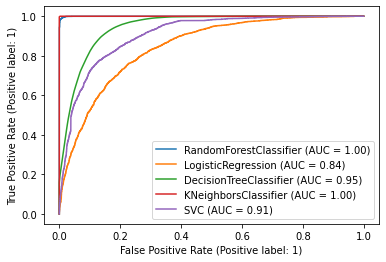

In [83]:
# Plotting ROC AUC curve on training data

disp = plot_roc_curve(rf,X_train,y_train)

plot_roc_curve(lr,X_train,y_train,ax=disp.ax_)

plot_roc_curve(dt,X_train,y_train,ax=disp.ax_)

plot_roc_curve(knn,X_train,y_train,ax=disp.ax_)

plot_roc_curve(svc,X_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

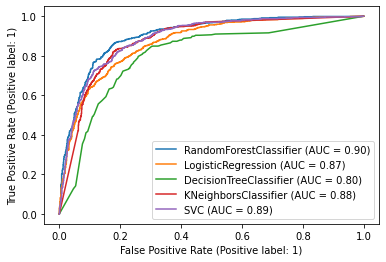

In [84]:
# Plotting ROC AUC curve on test data

disp = plot_roc_curve(rf,X_test,y_test)

plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)

plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)

plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

**As per ROC AUC Curve, SVC model fits best for the given dataset**

**Minimum difference between training and test accuracy**

**SAVING THE MODEL**

In [85]:
filename = 'customer_churn_clf.pkl'
pickle.dump(svc,open(filename,'wb'))

**CONCLUSION**

In [86]:
loaded_model = pickle.load(open('customer_churn_clf.pkl','rb'))

pred_svc = loaded_model.predict(X_test)

result = accuracy_score(y_test,pred_svc)

print(result*100)

81.01129639591178


In [87]:
conclusion = pd.DataFrame([pred_svc,y_test],index=['Predicted','Original'])

conclusion

,0,1,2,3,4,5,6,7,8,9,...,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858
Predicted,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,0,1,1
Original,0,1,1,1,1,1,1,0,0,0,...,1,1,1,0,0,1,1,0,1,1
